In [1]:
import numpy as np
import pandas as pd
from nilearn import image, plotting
import matplotlib.pylab as plt

In [2]:
from scipy.io import loadmat
import h5py

In [3]:
%matplotlib inline

In [4]:
# Expression data
f_exp = h5py.File('../data/Exp_by_gene_oneprobe_noNaNs.mat', 'r')
exp_mat = f_exp['Exp_by_gene_oneprobe_noNaNs'][:]
f_exp.close()

In [5]:
n_genes = exp_mat.shape[1]
n_genes

13788

In [6]:
f_coords = h5py.File('../data/coord_gene_1mm.mat', 'r')
coord_gene = f_coords['coord_gene'][:].astype(int).T
f_coords.close()

In [7]:
f_gene_list = h5py.File('../data/GenList_noNaNs.mat', 'r')

In [8]:
gen_list = []
for ii in range(n_genes):
    st = f_gene_list['GenList_noNaNs'][0][ii]
    obj = f_gene_list[st]
    str1 = ''.join(chr(i) for i in obj[:][:,0])
    gen_list.append(str1)

In [9]:
gen_list[:10]

['MRPL49',
 'ZNHIT2',
 'MPPED2',
 'MYRF',
 'TMEM258',
 'GAS8-AS1',
 'FMNL1',
 'PTTG1IP',
 'TMEM50B',
 'TNXB']

In [10]:
# Atlas
atlas = image.load_img("../data/Desikan_ASD_javi.nii.gz")
atlas = image.index_img(atlas, 0)

In [11]:
atlas.shape

(182, 218, 182)

In [12]:
# map samples to ROIs in atlas
samples_in_atlas = []
for ii in range(86):
    roi_mask = image.math_img("img1==%i"% (ii + 1), img1=atlas)
    
    sample_in_roi = np.array([roi_mask.get_fdata()[x,y,z] for (x,y,z) in coord_gene])
    
    samples_in_atlas.append(np.where(sample_in_roi==1)[0])

In [13]:
# Expression matrix in the atlas
exp_mat_atlas = np.array([np.nanmedian(exp_mat[samples_in_atlas[ii],:], 0) for ii in range(86)])

/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [14]:
exp_mat_atlas.shape

(86, 13788)

In [15]:
Fs_df = pd.read_csv("../data/mdmr_clusters_healthy_stats.csv")

In [16]:
r_obs = np.zeros((exp_mat_atlas.shape[1], 3))
for ii in range(exp_mat_atlas.shape[1]):
        gen_value = exp_mat_atlas[:,ii]
        mask = ~np.isnan(gen_value)
        for jj in range(3):
            f = Fs_df.iloc[:, jj+1].values
            r_obs[ii, jj] = np.corrcoef(f[mask], gen_value[mask])[0,1]

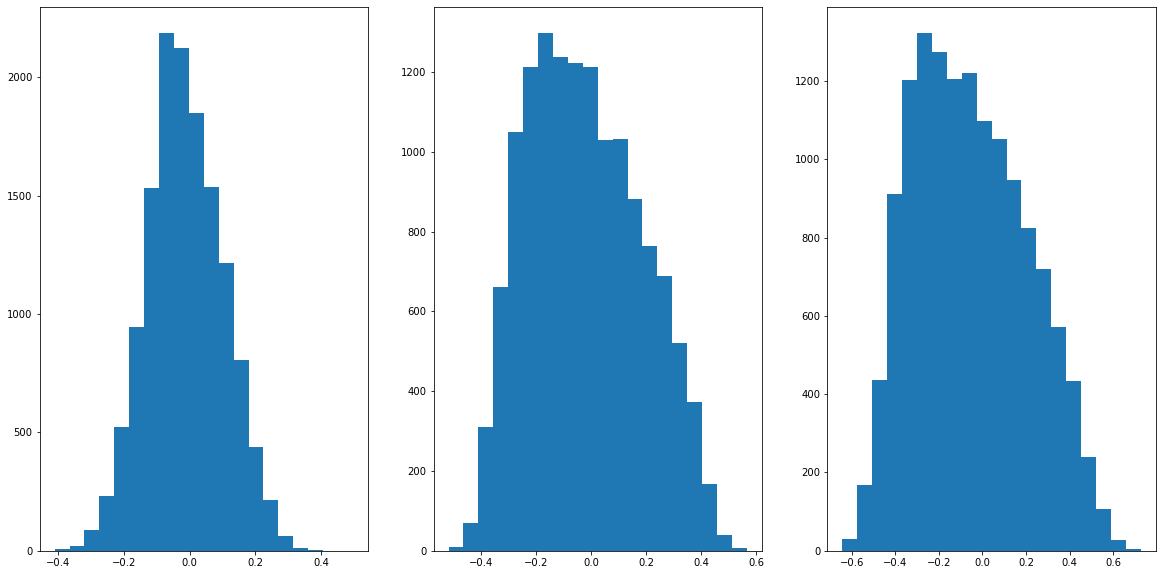

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))
axs = axs.flatten()
axs[0].hist(r_obs[:,0], bins=20)
axs[1].hist(r_obs[:,1], bins=20)
axs[2].hist(r_obs[:,2], bins=20)
pass

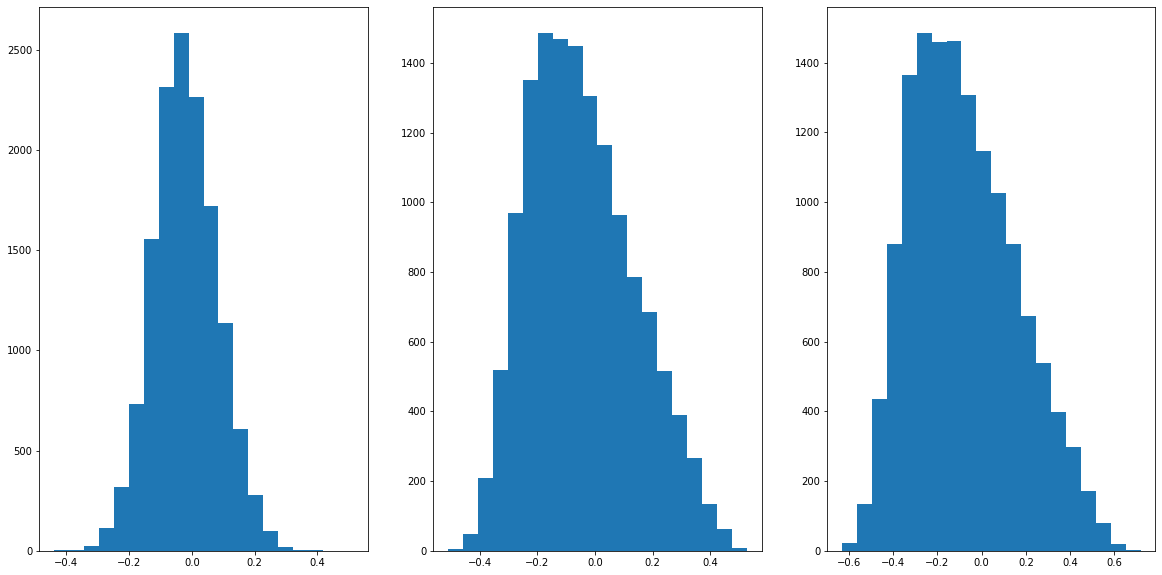

In [264]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))
axs = axs.flatten()
axs[0].hist(r_obs[:,0], bins=20)
axs[1].hist(r_obs[:,1], bins=20)
axs[2].hist(r_obs[:,2], bins=20)
pass

In [42]:
from scipy.stats import zscore

In [279]:
print("cluster 1 pos-corr = %i, neg-corr = %i" % (sum(zscore(r_obs)[:,0]>2), 
                                                  sum(zscore(r_obs)[:,0]<-2)))
print("cluster 2 pos-corr = %i, neg-corr = %i" % (sum(zscore(r_obs)[:,1]>2), 
                                                  sum(zscore(r_obs)[:,1]<-2)))
print("cluster 3 pos-corr = %i, neg-corr = %i" % (sum(zscore(r_obs)[:,2]>2), 
                                                  sum(zscore(r_obs)[:,2]<-2)))

cluster 1 pos-corr = 384, neg-corr = 265
cluster 2 pos-corr = 468, neg-corr = 47
cluster 3 pos-corr = 494, neg-corr = 28
